In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

In [2]:
file_name = "melb_data.csv"
df = pd.read_csv(file_name)
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [4]:
print(df.BuildingArea.mean())
df.BuildingArea = df.BuildingArea.fillna(round(df.BuildingArea.mean(), 2))

151.96764988779805


In [5]:
print(df.YearBuilt.median())
df.YearBuilt = df.YearBuilt.fillna(df.YearBuilt.mean())

1970.0


In [6]:
print(df.CouncilArea.mode()[0])
df.CouncilArea = df.CouncilArea.fillna(df.CouncilArea.mode()[0])

Moreland


In [7]:
df = df.dropna(subset=['Car'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13518 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13518 non-null  object 
 1   Address        13518 non-null  object 
 2   Rooms          13518 non-null  int64  
 3   Type           13518 non-null  object 
 4   Price          13518 non-null  float64
 5   Method         13518 non-null  object 
 6   SellerG        13518 non-null  object 
 7   Date           13518 non-null  object 
 8   Distance       13518 non-null  float64
 9   Postcode       13518 non-null  float64
 10  Bedroom2       13518 non-null  float64
 11  Bathroom       13518 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13518 non-null  float64
 14  BuildingArea   13518 non-null  float64
 15  YearBuilt      13518 non-null  float64
 16  CouncilArea    13518 non-null  object 
 17  Lattitude      13518 non-null  float64
 18  Longtitude 

In [9]:
print("count distinct values of Suburb : "+str(df['Suburb'].nunique()))
print("count distinct values of Address : "+str(df['Address'].nunique()))
print("count distinct values of Type : "+str(df['Type'].nunique()))
print("count distinct values of Method : "+str(df['Method'].nunique()))
print("count distinct values of SellerG : "+str(df['SellerG'].nunique()))
print("count distinct values of Date : "+str(df['Date'].nunique()))
print("count distinct values of CouncilArea : "+str(df['CouncilArea'].nunique()))
print("count distinct values of Regionname : "+str(df['Regionname'].nunique()))

count distinct values of Suburb : 314
count distinct values of Address : 13318
count distinct values of Type : 3
count distinct values of Method : 5
count distinct values of SellerG : 268
count distinct values of Date : 58
count distinct values of CouncilArea : 33
count distinct values of Regionname : 8


In [10]:
df = pd.get_dummies(df, columns=['Type'], drop_first=False)
df = pd.get_dummies(df, columns=['Method'], drop_first=False)
df = pd.get_dummies(df, columns=['Regionname'], drop_first=False)

In [11]:
le = LabelEncoder()
# df['Suburb'] = le.fit_transform(df['Suburb'])
# df['SellerG'] = le.fit_transform(df['SellerG'])
# df['Regionname'] = le.fit_transform(df['Regionname'])
df['CouncilArea'] = le.fit_transform(df['CouncilArea'])

In [12]:
target_encoder = ce.TargetEncoder(cols=['Suburb', 'SellerG'])
df[['Suburb', 'SellerG']] = target_encoder.fit_transform(df[['Suburb', 'SellerG']], df['Price'])

In [13]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [14]:
df = df.drop(columns=['Address','Date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13518 entries, 0 to 13579
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Suburb                                 13518 non-null  float64
 1   Rooms                                  13518 non-null  int64  
 2   Price                                  13518 non-null  float64
 3   SellerG                                13518 non-null  float64
 4   Distance                               13518 non-null  float64
 5   Postcode                               13518 non-null  float64
 6   Bedroom2                               13518 non-null  float64
 7   Bathroom                               13518 non-null  float64
 8   Car                                    13518 non-null  float64
 9   Landsize                               13518 non-null  float64
 10  BuildingArea                           13518 non-null  float64
 11  YearBui

In [16]:
numeric_features = ['Rooms', 'Price', 'Distance'
                    ,'Bedroom2', 'Bathroom', 'Car', 'Landsize'
                    ,'BuildingArea', 'YearBuilt','Propertycount']

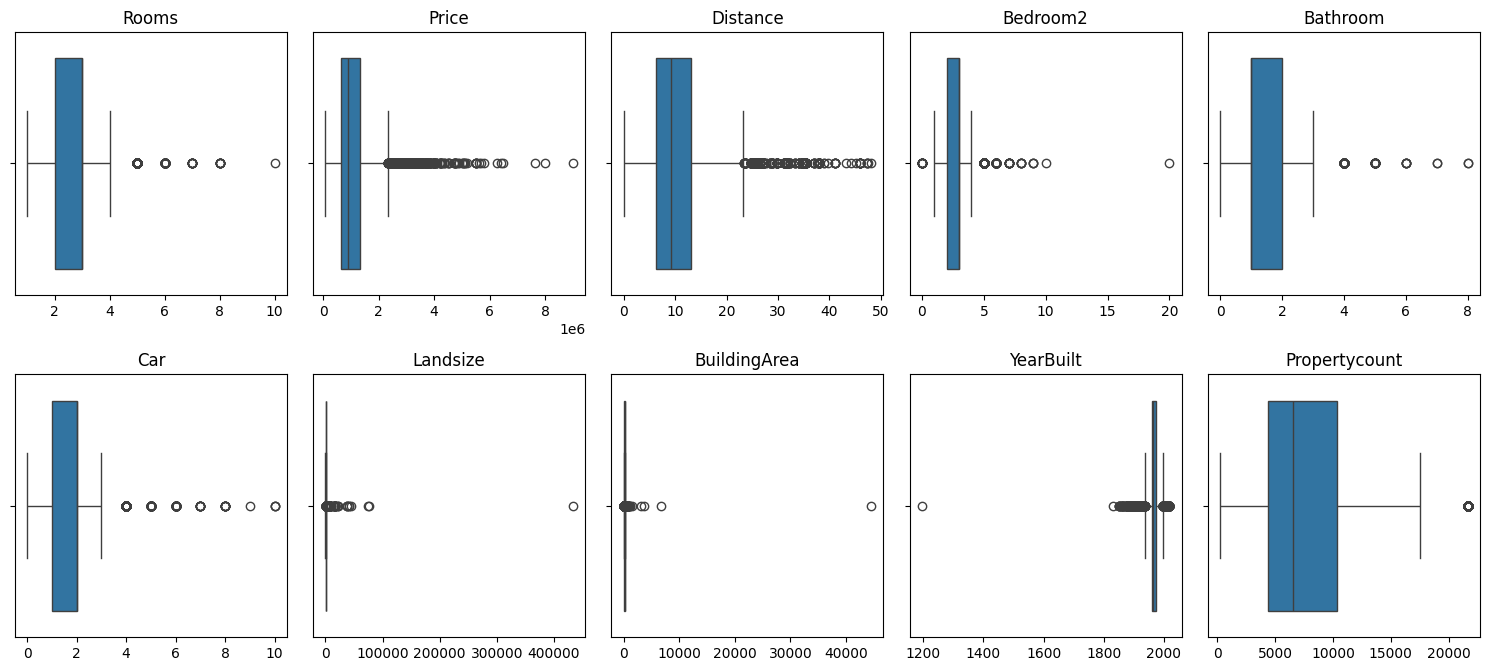

In [17]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numeric_features):
    plt.subplot(3, 5, i + 1)  # Adjust subplot grid size (3 rows, 5 columns)
    sns.boxplot(data=df, x=feature)
    plt.title(feature)  # Add a title for each subplot
    plt.xlabel("")  # Remove x-axis labels for better clarity

plt.tight_layout()
plt.show()

In [18]:
numeric_features = ['Rooms', 'Price', 'Distance'
                    ,'Bedroom2', 'Bathroom', 'Car', 'Landsize'
                    ,'BuildingArea', 'YearBuilt']

In [19]:
def winsorize_data(data, features, lower_percentile=0.1, upper_percentile=0.9):
    for feature in features:
        lower_limit = data[feature].quantile(lower_percentile)
        upper_limit = data[feature].quantile(upper_percentile)

        # Apply Winsorization
        data[feature] = np.where(data[feature] < lower_limit, lower_limit, data[feature])
        data[feature] = np.where(data[feature] > upper_limit, upper_limit, data[feature])

    return data

# Apply Winsorization
df = winsorize_data(df.copy(), numeric_features)

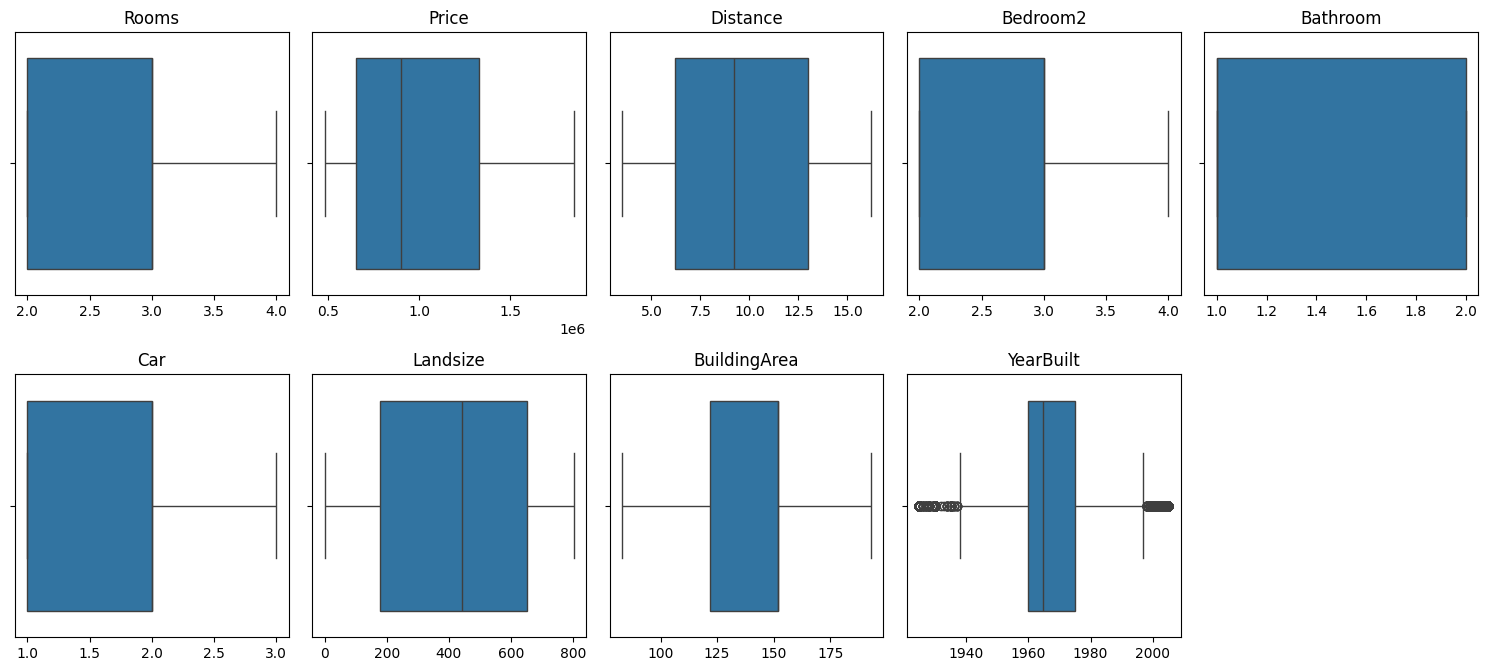

In [20]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numeric_features):
    plt.subplot(3, 5, i + 1)  # Adjust subplot grid size (3 rows, 5 columns)
    sns.boxplot(data=df, x=feature)
    plt.title(feature)  # Add a title for each subplot
    plt.xlabel("")  # Remove x-axis labels for better clarity

plt.tight_layout()
plt.show()

In [21]:
x = df.iloc[:,df.columns != 'Price'].values
y = df.iloc[:,2].values
print(y.shape)
print(x.shape)

(13518,)
(13518, 34)


In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=36)

In [23]:
scale = StandardScaler()

x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [24]:
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [25]:
y_pred = model.predict(x_test)
print(y_pred.shape)
y_test.shape

(2704,)


(2704,)

In [31]:
Linear_mse = mean_squared_error(y_test, y_pred)
Linear_mae = mean_absolute_error(y_test, y_pred)
Linear_r2 = r2_score(y_test, y_pred)
print("Linear Regression model MAE : " + str(Linear_mae) )
print("Linear Regression model MSE : " + str(Linear_mse) )
print("Linear Regression model R-squared : " + str(Linear_r2))
#R-squared : 0.7473102959446299

Linear Regression model MAE : 142551.80325443787
Linear Regression model MSE : 38849015848.99356
Linear Regression model R-squared : 0.7998295585322703


In [27]:
k = 14
model = KNeighborsRegressor(n_neighbors=k,metric='manhattan')
model.fit(x_train,y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=14)

In [28]:
y_pred = model.predict(x_test)
y_pred.shape

(2704,)

In [30]:
KNN_mse = mean_squared_error(y_test, y_pred)
KNN_mae = mean_absolute_error(y_test, y_pred)
KNN_r2 = r2_score(y_test, y_pred)
print("KNN Regression model MAE : " + str(KNN_mae) )
print("KNN Regression model MSE : " + str(KNN_mse) )
print("KNN Regression model R-squared : " + str(KNN_r2 ))

KNN Regression model MAE : 142551.80325443787
KNN Regression model MSE : 38849015848.99356
KNN Regression model R-squared : 0.7998295585322703
